<h1>Spacial density of Na and K in various traps</h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from typing import Union

from quantum_statistics import (
    ParticleProps, 
    BEC, 
    FermiGas, 
    harmonic_trap,
    box_trap,
    box_2d_harmonic_1d_trap,
    analyze_bec,
    plot_condens_frac,
)

In [2]:
k40_harmonic = ParticleProps(
    name="K40_harmonic",
    species="fermion",
    m=39.963999*u.u,
    N_particles=200000,
    T=0*u.nK,
    domain=(-100, 100) * u.um,
    V_trap=harmonic_trap,
    trap_depth=17*100, # kwarg for V_trap
    waist=50,          # kwarg for V_trap
    inhomogenity=0,    # kwarg for V_trap
)

k40_inhomog_box = ParticleProps(
    name="K40_inhomog_box",
    species="fermion",
    m=39.963999*u.u,
    N_particles=200000,
    T=0*u.nK,
    domain=(-100, 100) * u.um,
    V_trap=box_trap,
    trap_depth=17*100, # kwarg for V_trap
    box_width=100,     # kwarg for V_trap
    inhomogenity=0.01, # kwarg for V_trap
)

In [3]:
fg_harmonic = FermiGas(k40_harmonic)
fg_inhomog_box = FermiGas(k40_inhomog_box)

In [4]:
fg_inhomog_box.eval_density()

  0%|          | 0/1000 [00:00<?, ?it/s]

  6%|▌         | 57/1000 [00:01<00:29, 31.79it/s]

Convergence reached after 57 iterations.


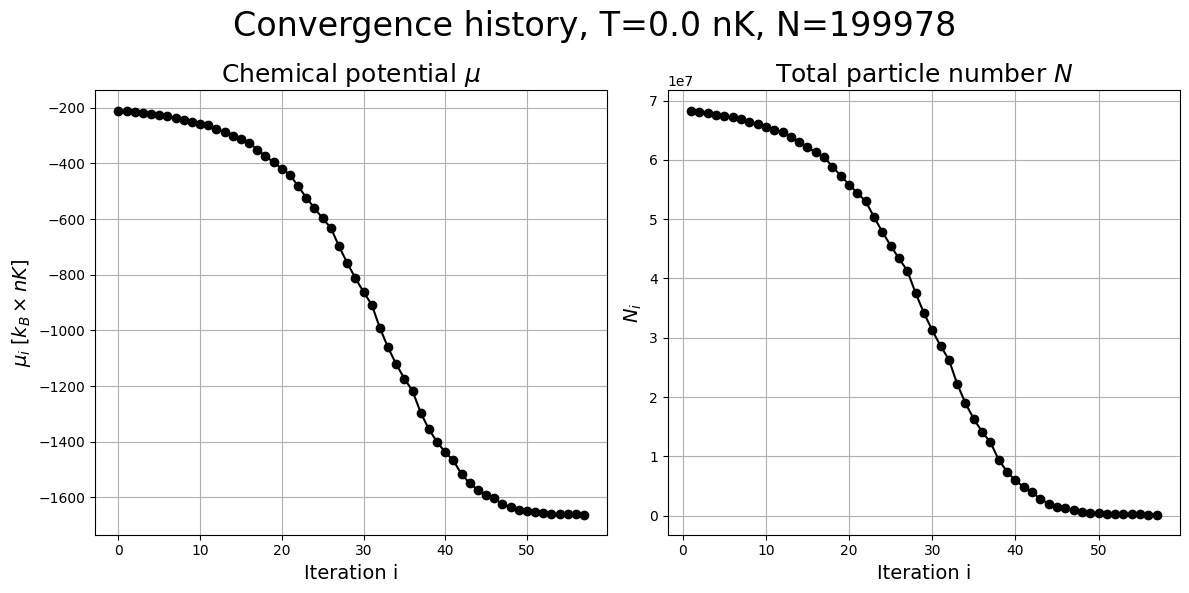

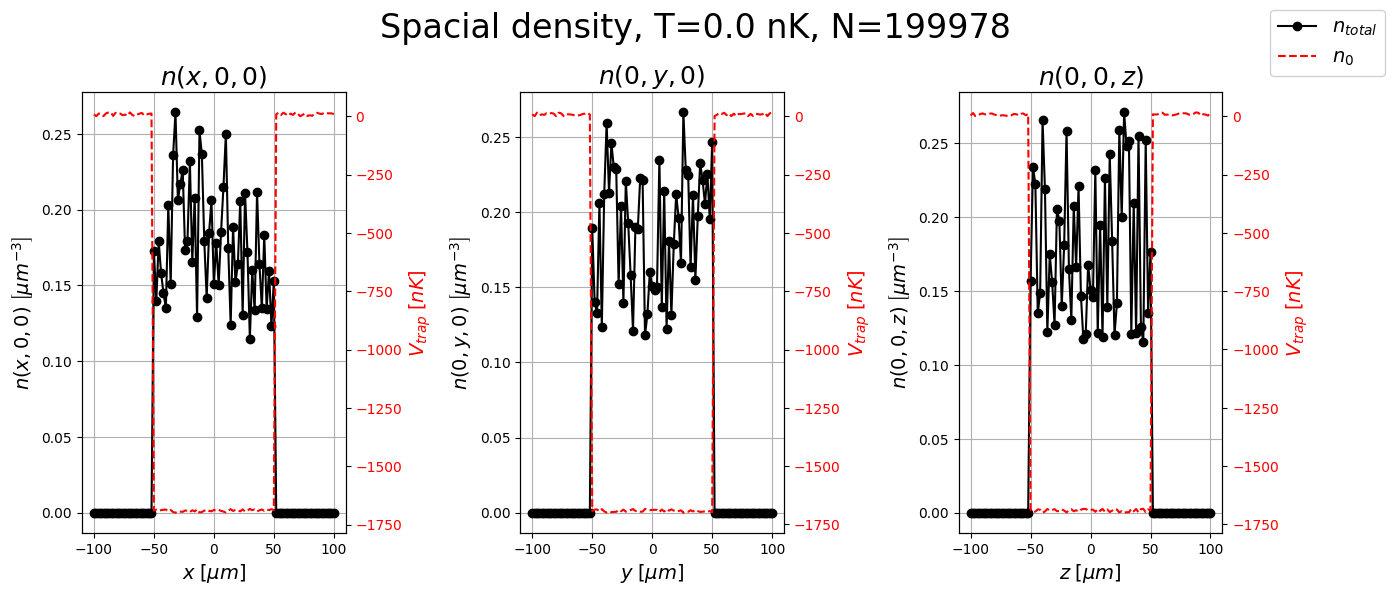

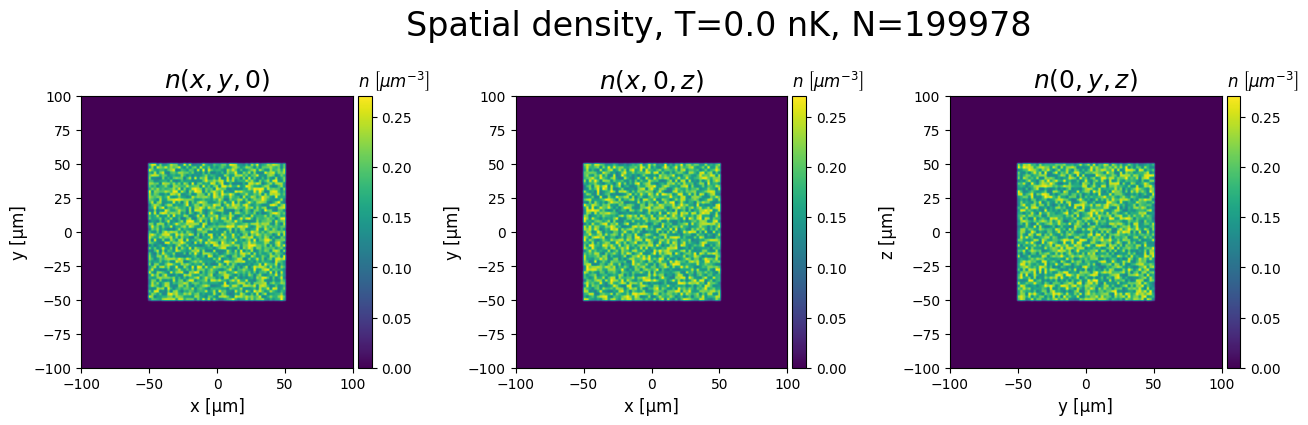

In [5]:
fg_inhomog_box.plot_all()

<h3>Test: Calculate Na BEC density in perfect harmonic trap</h3>

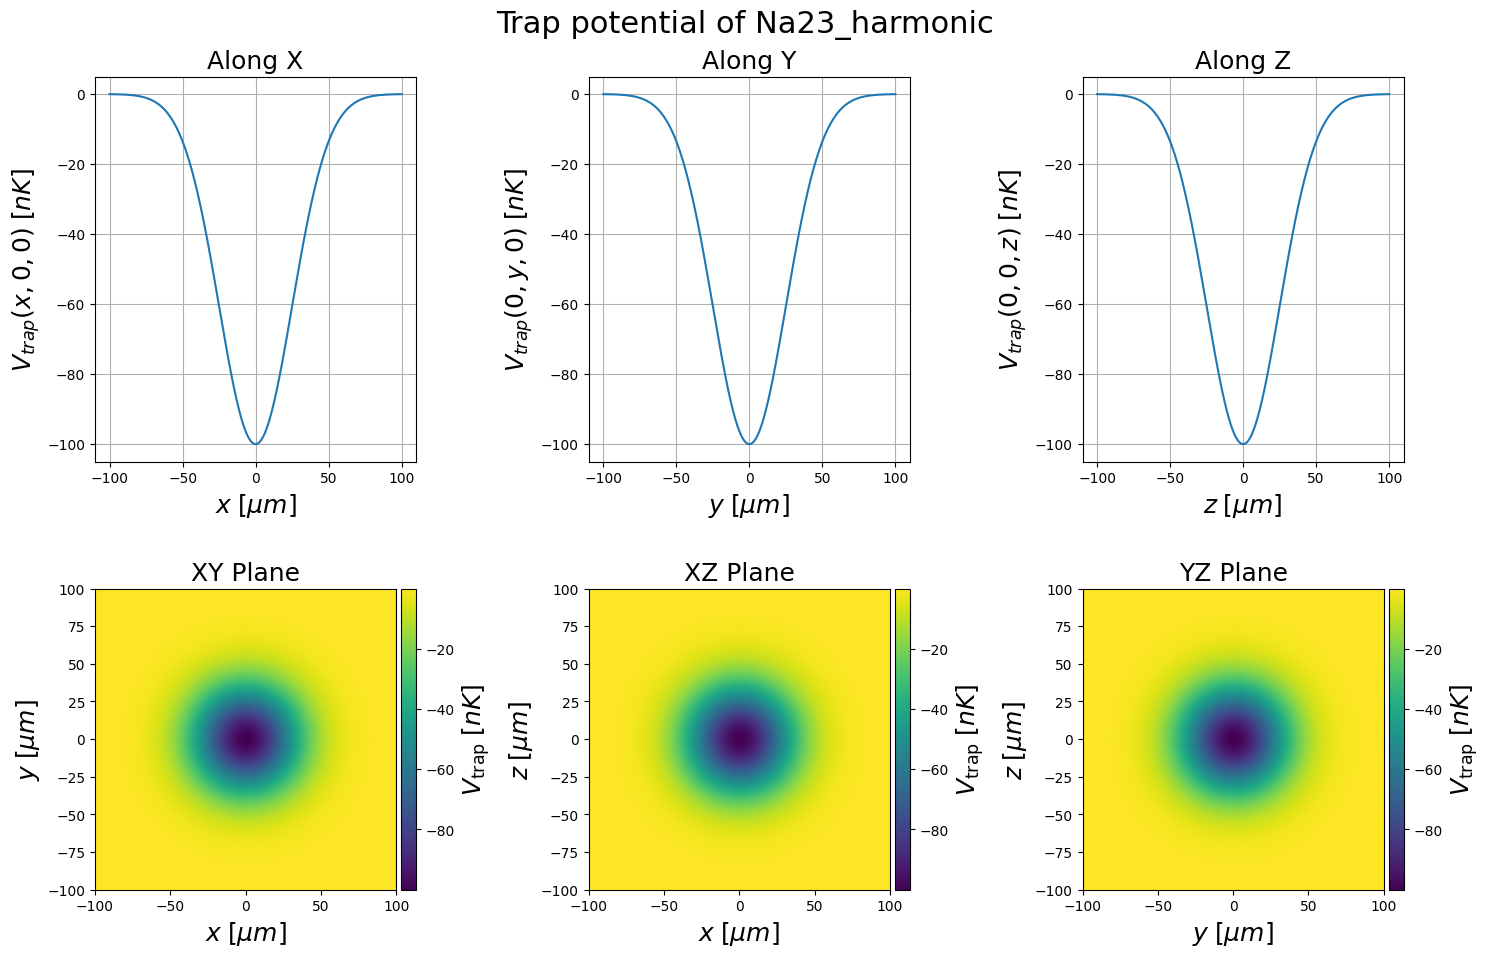

In [5]:
na23_harmonic = ParticleProps(
    name="Na23_harmonic",
    species="boson",
    m=22.989768*u.u,
    N_particles=200000,
    T=0*u.nK, # We will later loop over a range of temperatures, so this is just a placeholder
    a_s=2.75*u.nm,
    domain=(-100, 100) * u.um,
    V_trap=harmonic_trap,
    trap_depth=100, # kwarg for V_trap
    waist=50,       # kwarg for V_trap
    inhomogenity=0, # kwarg for V_trap
)

na23_harmonic.plot_V_trap('all')

In [3]:
Ts = np.linspace(0, 46, 10) * u.nK
becs = analyze_bec(Ts, na23_harmonic)

  0%|          | 5/1000 [00:00<00:46, 21.61it/s]


Convergence reached after 5 iterations.


  0%|          | 2/1000 [00:12<1:46:18,  6.39s/it]


Convergence reached after 2 iterations.


  0%|          | 2/1000 [00:12<1:41:04,  6.08s/it]


Convergence reached after 2 iterations.


  0%|          | 3/1000 [00:16<1:30:15,  5.43s/it]


Convergence reached after 3 iterations.


  0%|          | 3/1000 [00:15<1:27:12,  5.25s/it]


Convergence reached after 3 iterations.


  0%|          | 4/1000 [00:21<1:27:21,  5.26s/it]


Convergence reached after 4 iterations.


  0%|          | 4/1000 [00:21<1:30:24,  5.45s/it]


Convergence reached after 4 iterations.


  0%|          | 4/1000 [00:32<2:16:43,  8.24s/it]


Convergence reached after 4 iterations.


  0%|          | 4/1000 [00:28<1:58:21,  7.13s/it]


Convergence reached after 4 iterations.


  0%|          | 4/1000 [00:20<1:26:56,  5.24s/it]

Convergence reached after 4 iterations.


/home/lelo/Dokumente/lightmat/quantum_statistics/analyze_gas.py:134: RuntimeWarning: divide by zero encountered in power
  return 1 - (T / T_c)**alpha


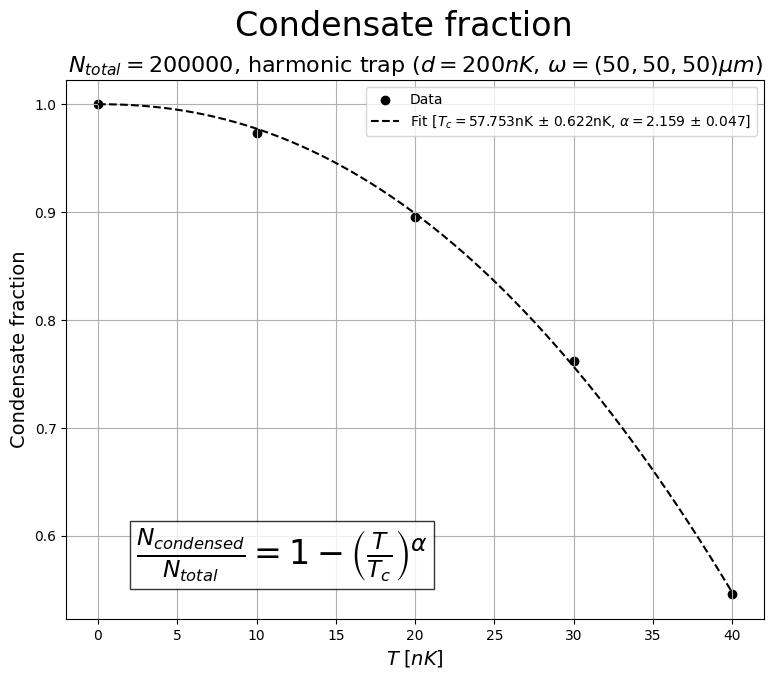

In [4]:
plot_condens_frac(Ts, becs)

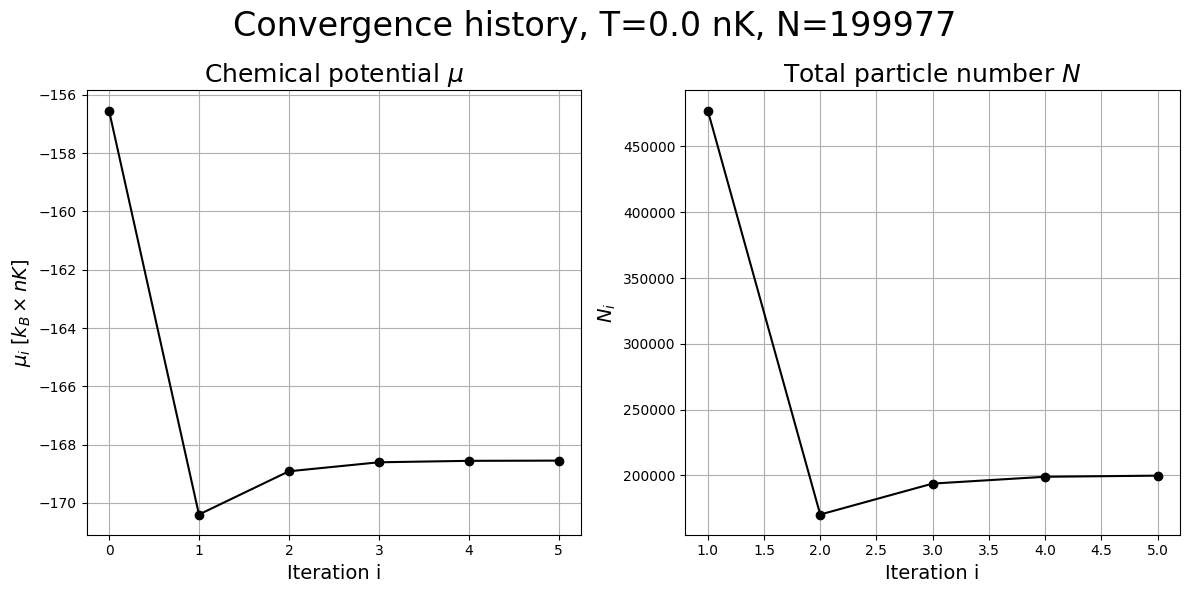

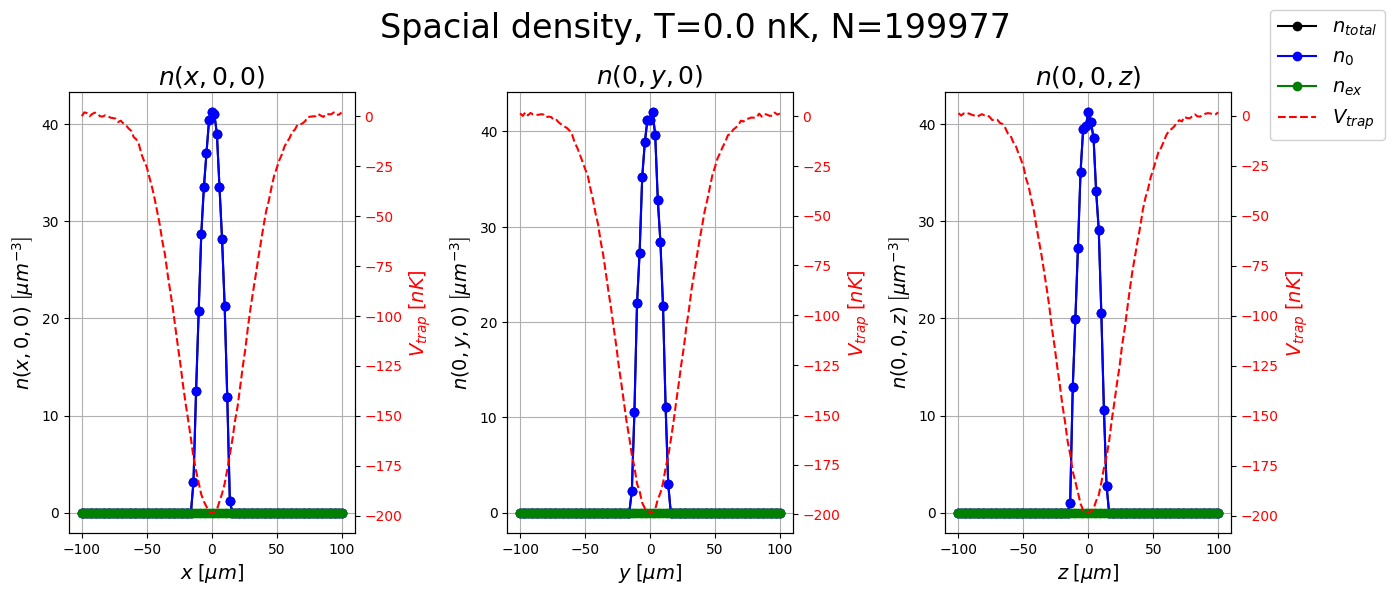

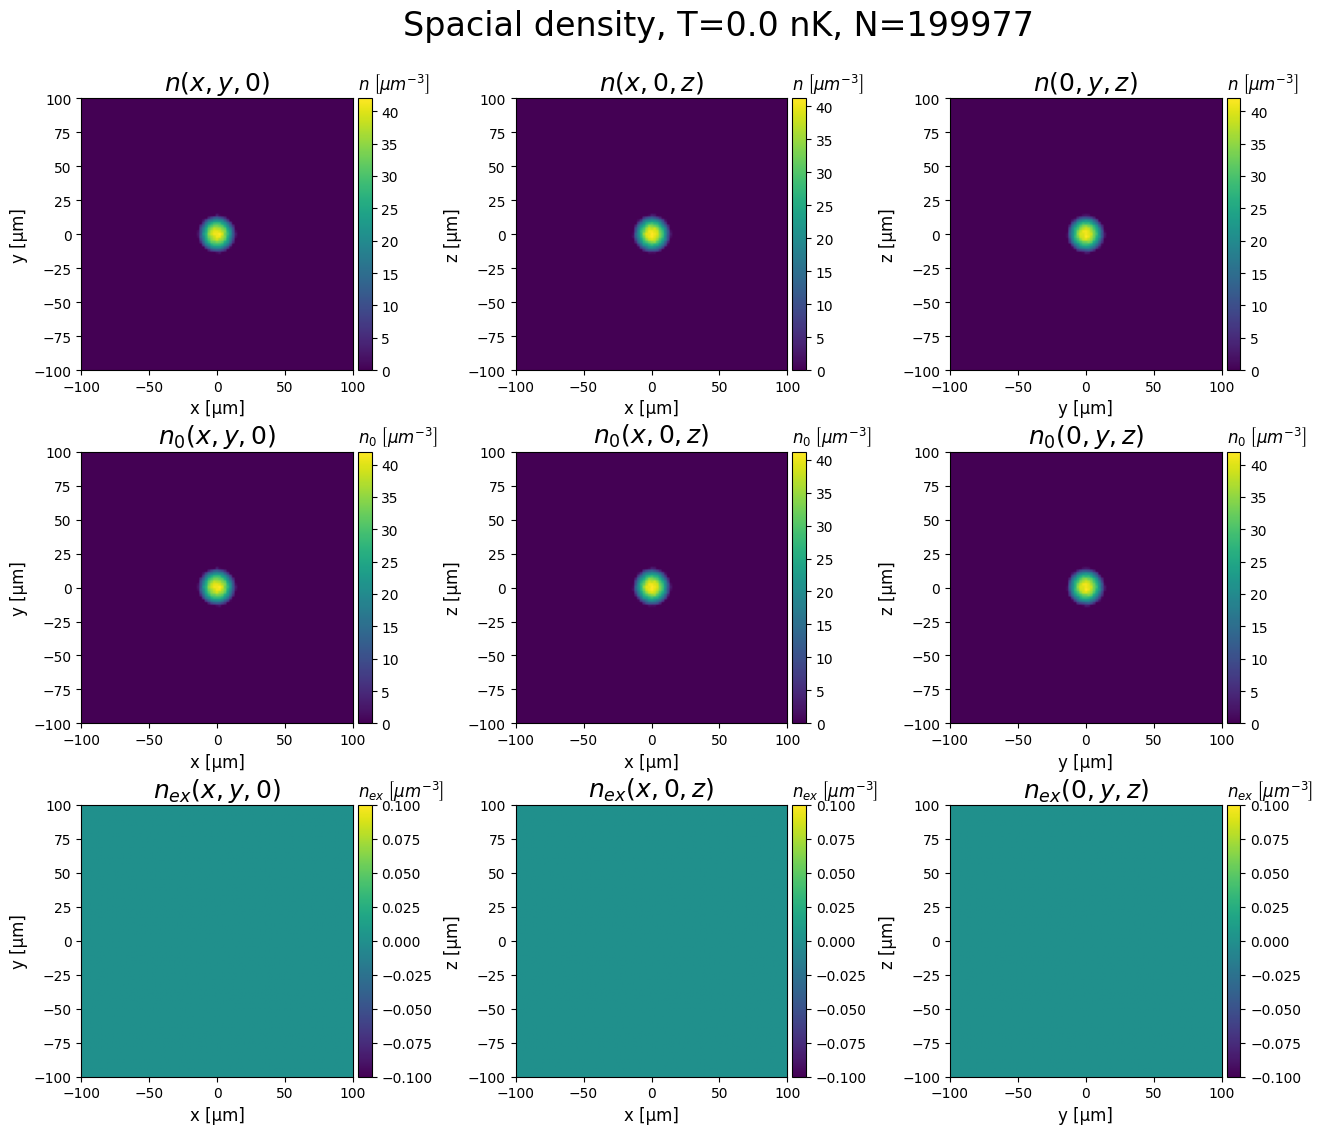

In [5]:
becs[0].plot_all()

<h3>Test: Calculate Na BEC density in 2d box and 1d harmonic trap</h3>

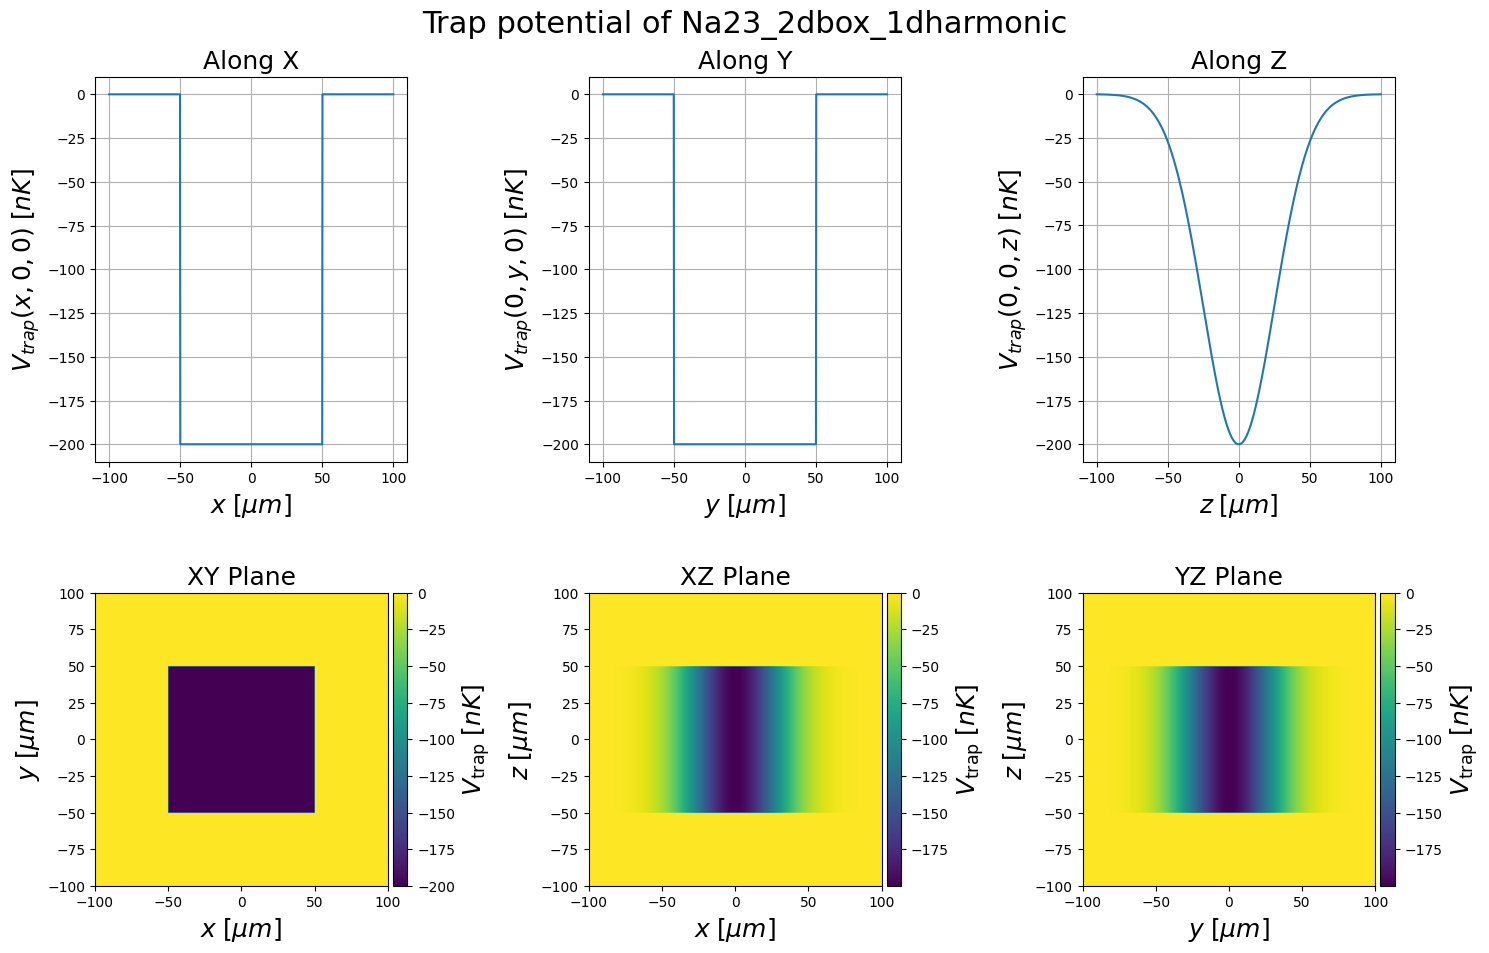

In [2]:
na23_2dbox_1dharmonic =  ParticleProps(
                            name="Na23_2dbox_1dharmonic",
                            species="boson",
                            m=22.989768*u.u,
                            N_particles=200000,
                            T=0*u.nK, # We will later loop over a range of temperatures, so this is just a placeholder
                            a_s=2.75*u.nm,
                            domain=(-100, 100)*u.um,
                            V_trap=box_2d_harmonic_1d_trap,
                            trap_depth=200,        # kwarg for V_trap
                            box_width=(100, 100),  # kwarg for V_trap
                            waist=50,              # kwarg for V_trap
                            inhomogenity=0,        # kwarg for V_trap
                        )

na23_2dbox_1dharmonic.plot_V_trap('all')

In [3]:
Ts = np.linspace(0, 40, 5) * u.nK
becs = analyze_bec(Ts, na23_2dbox_1dharmonic)

  0%|          | 0/1000 [00:00<?, ?it/s]

  4%|▍         | 38/1000 [00:01<00:39, 24.52it/s]


Convergence reached after 38 iterations.


  3%|▎         | 30/1000 [02:10<1:10:28,  4.36s/it]


Convergence reached after 30 iterations.


  4%|▎         | 35/1000 [02:34<1:11:08,  4.42s/it]


Convergence reached after 35 iterations.


  4%|▍         | 38/1000 [02:51<1:12:24,  4.52s/it]


Convergence reached after 38 iterations.


  4%|▍         | 38/1000 [02:52<1:12:35,  4.53s/it]

Convergence reached after 38 iterations.


/home/lelo/Dokumente/lightmat/quantum_statistics/analyze_gas.py:134: RuntimeWarning: divide by zero encountered in power
  return 1 - (T / T_c)**alpha


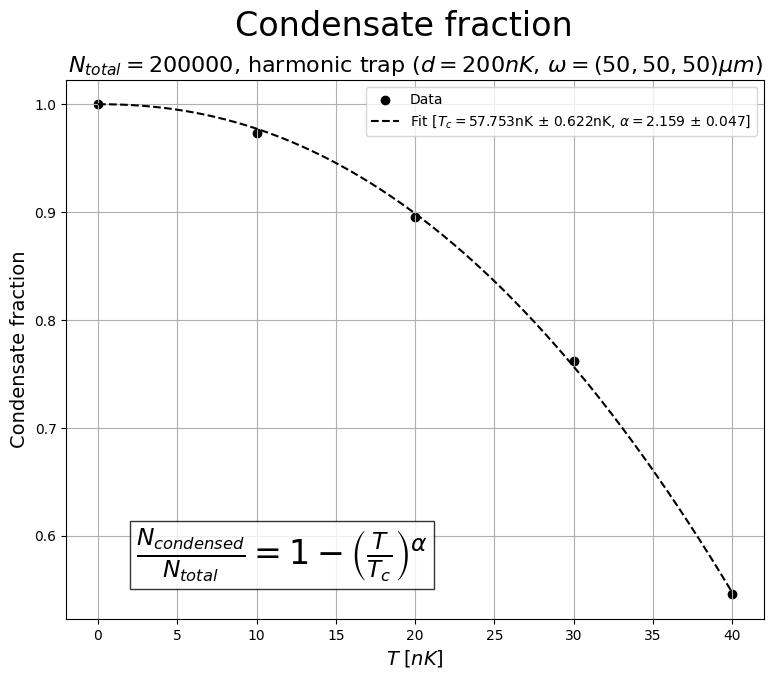

In [5]:
plot_condens_frac(Ts, becs)

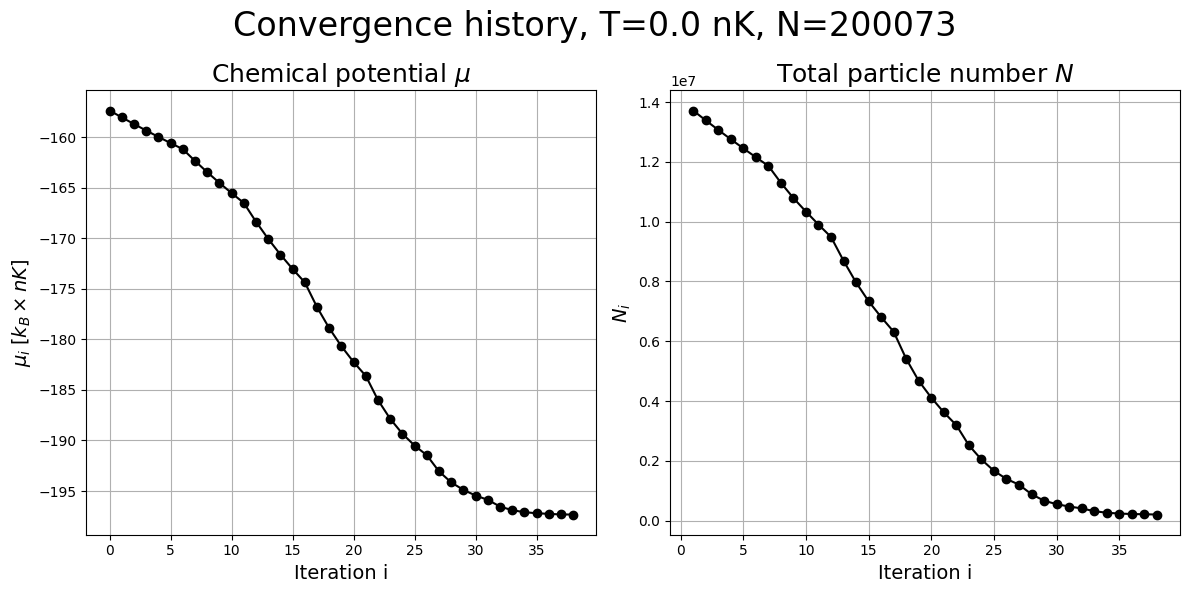

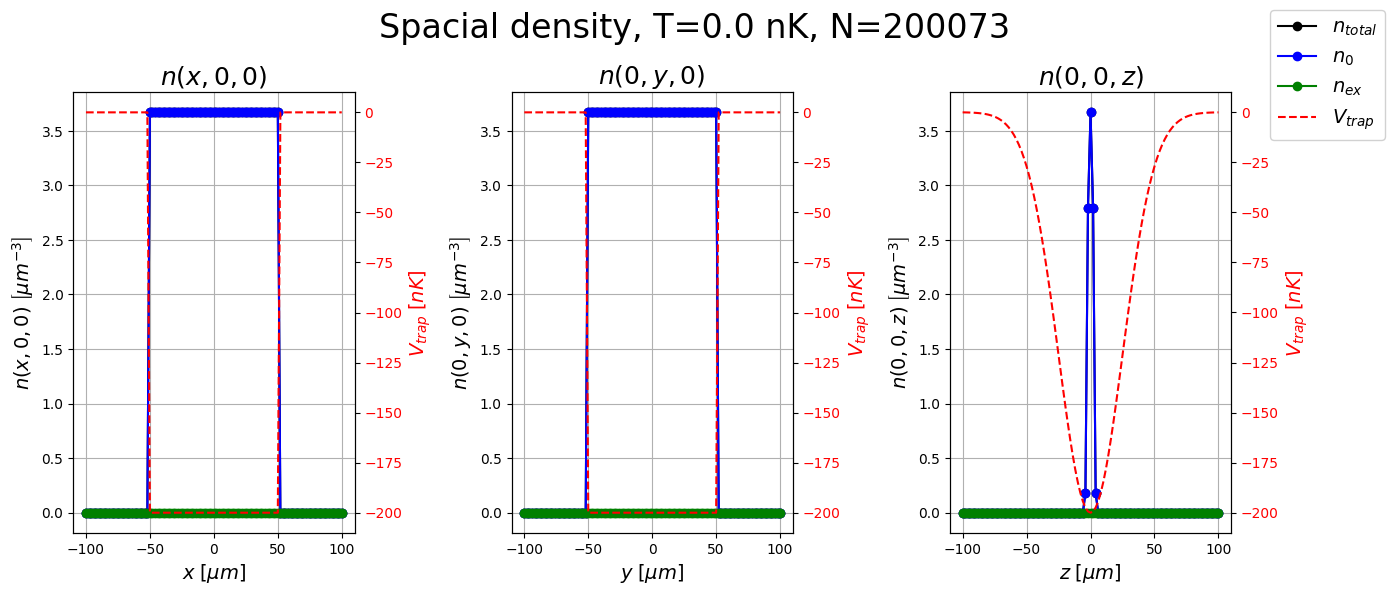

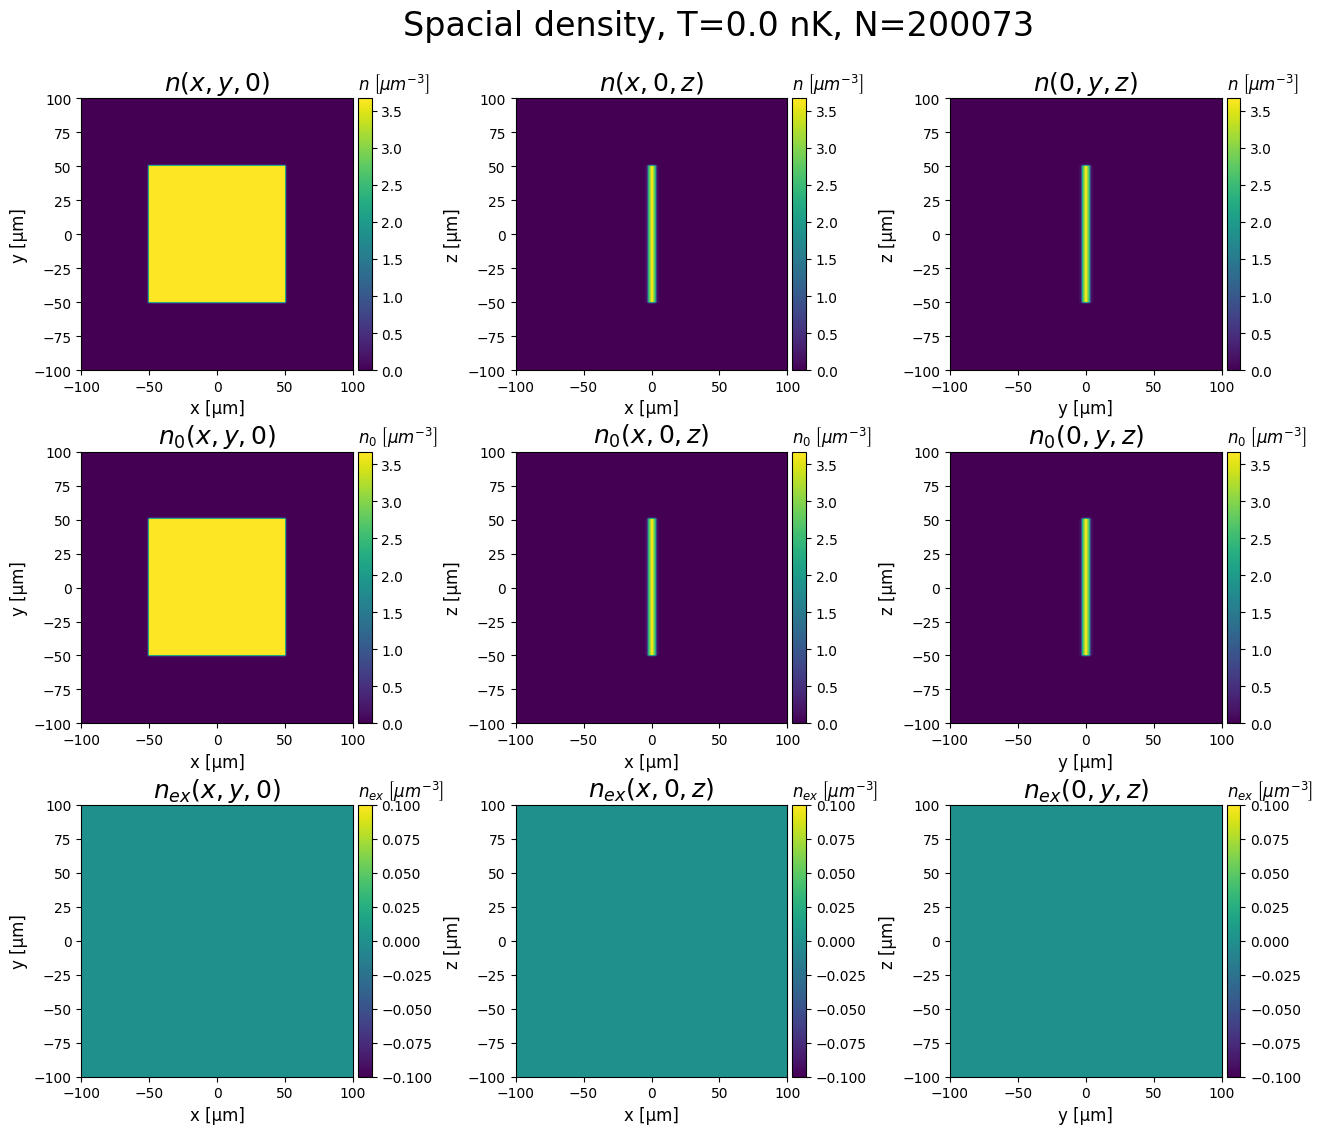

In [6]:
becs[0].plot_all()

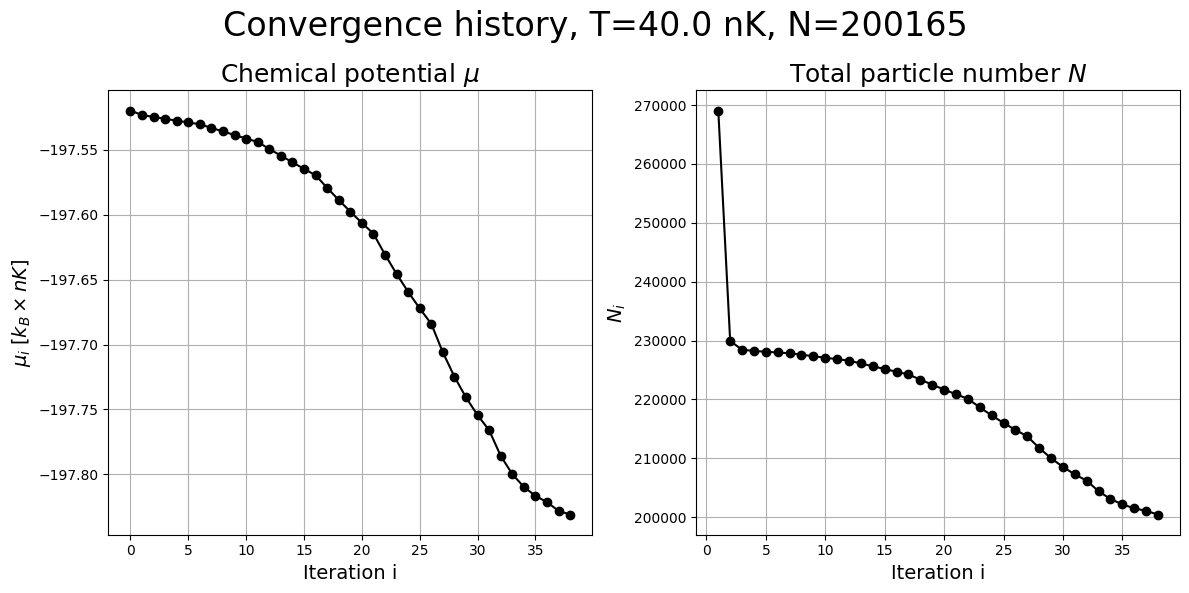

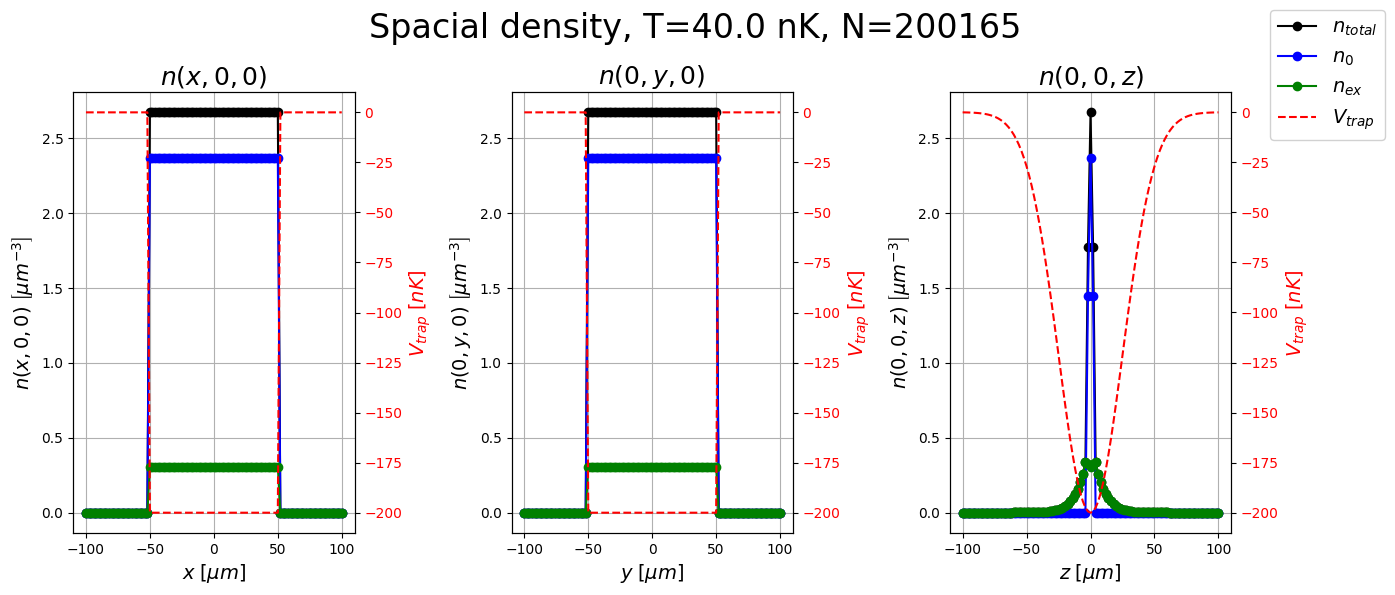

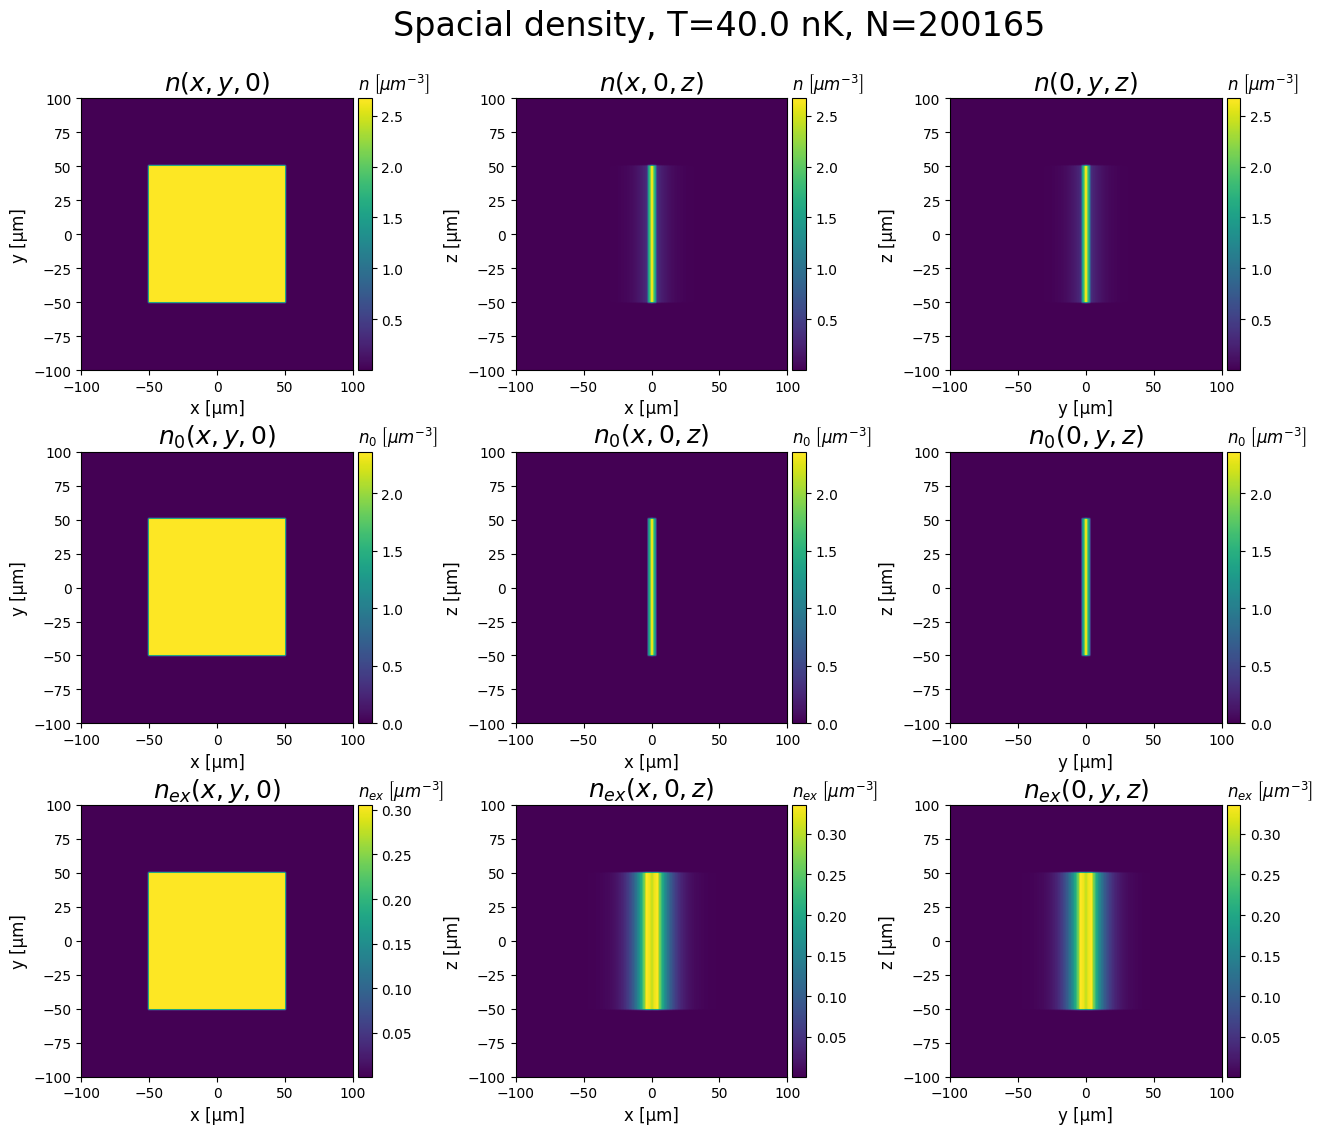

In [7]:
becs[-1].plot_all()

In [ ]:
import qutip as qt

# Parameters
N = 20  # Number of grid points in each dimension
m = 1.0  # Particle mass
hbar = 1.0  # Reduced Planck's constant

# Create position and momentum operators for each dimension
x = qt.position(N)
y = qt.position(N)
z = qt.position(N)
p_x = qt.momentum(N)
p_y = qt.momentum(N)
p_z = qt.momentum(N)

# Kinetic energy operator
kinetic_energy = (p_x**2 + p_y**2 + p_z**2) / (2 * m)

# Tensor product to create 3D operators
X = qt.tensor(x, qt.qeye(N), qt.qeye(N))
Y = qt.tensor(qt.qeye(N), y, qt.qeye(N))
Z = qt.tensor(qt.qeye(N), qt.qeye(N), z)
K = qt.tensor(kinetic_energy, qt.qeye(N), qt.qeye(N)) + qt.tensor(qt.qeye(N), kinetic_energy, qt.qeye(N)) + qt.tensor(qt.qeye(N), qt.qeye(N), kinetic_energy)

# Define the 3D potential V(x, y, z)
# Example: a simple isotropic harmonic oscillator
omega = 1.0  # angular frequency
V = 0.5 * m * omega**2 * (X**2 + Y**2 + Z**2)

# Hamiltonian
H = K + V

# Solve for eigenvalues and eigenstates (first few due to computational limits)
eigenenergies, eigenstates = H.eigenstates(eigvals=10)

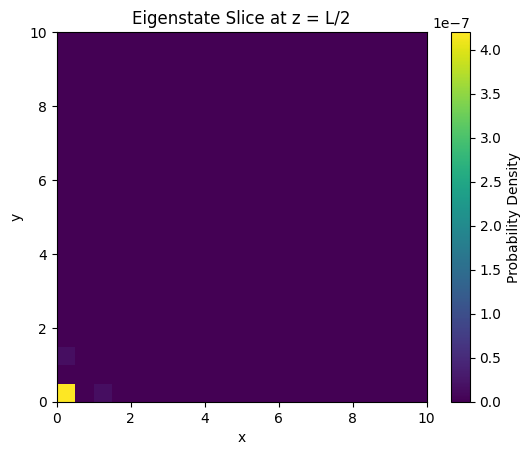

In [ ]:
eigenstate = eigenstates[0]  # for example, the first eigenstate

# Convert to a dense matrix and reshape to 3D
data = eigenstate.full().reshape((N, N, N))

# Choose a slice (e.g., middle of the grid along z-axis)
z_slice = data[:, :, N // 2]

# Create a 2D plot
plt.imshow(np.abs(z_slice)**2, extent=[0, L, 0, L], origin='lower')
plt.colorbar(label='Probability Density')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Eigenstate Slice at z = L/2')
plt.show()

In [ ]:
def box2d_harmonic1d(
        x: Union[float, np.ndarray],
        y: Union[float, np.ndarray],
        z: Union[float, np.ndarray],
        trap_depth: float = 200,
        box_width: float = 50,
        waist: float = 50,
    ) -> Union[float, np.ndarray]:
    """Return a harmonic trap potential in [k_B x nK] for given position(s) in [μm].
    
        Args:
            x, y, z: position in [μm]
            trap_depth: trap depth in [k_B x nK]. Defaults to 200nK.
            waist: region in which we can model the trap as harmonic is [-waist, waist] in [μm]. Defaults to 80μm.

        Returns:
            V(x, y, z): harmonic trap potential in [k_B x nK], array of same shape as x, y, z
    """
    r_squared = x**2 + y**2 + z**2
    gaussian_profile = np.exp(-2 * r_squared / waist**2)
    return -trap_depth * gaussian_profile